<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании. Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [5]:
# Функция для вывода общей информации
def begin(data):
    print(data.head())
    print('\n Общая информация\n')
    print(data.info())
    print('\n Описательная статистика\n')
    print(data.describe())
    print('\n Количество пропущенных значений:', data.isna().sum().sum())
    print('\n Количество дубликатов:', data.duplicated(keep = False).sum())
    print('\n Гистограмма распределения')
    data.hist(figsize=(7,9))

   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0

 Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None

 Описательная статистика

               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000

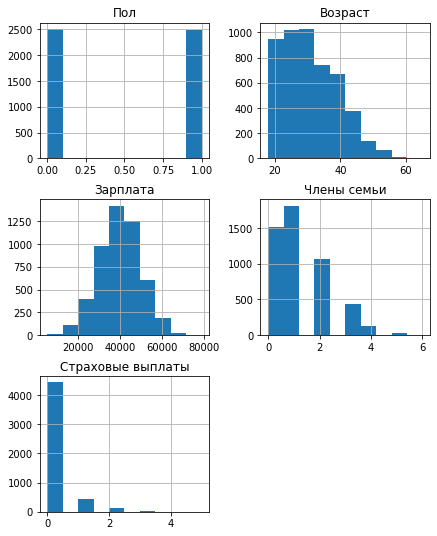

In [56]:
begin(df)

In [57]:
# Изменим тип данных в столбцах "Возраст" и "Зарплата"
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

In [58]:
# Проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


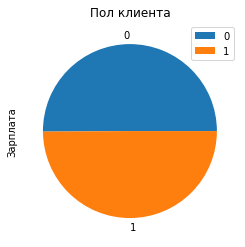

In [59]:
df.groupby(['Пол']).count().plot(kind='pie', y='Зарплата', title = 'Пол клиента');

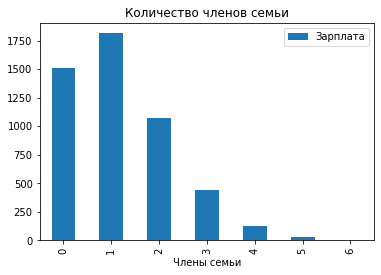

In [60]:
df.groupby(['Члены семьи']).count().plot(kind='bar', y='Зарплата', title = 'Количество членов семьи');

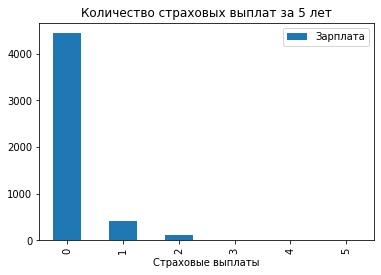

In [61]:
df.groupby(['Страховые выплаты']).count().plot(kind='bar', y='Зарплата', title = 'Количество страховых выплат за 5 лет');

В исходных данных представлена информация по застрахованным клиентам компании. Всего в датафрейме 5000 строк и 5 столбцов.
*Признаки:* пол, возраст и зарплата застрахованного, количество членов его семьи.

*Целевой признак:* количество страховых выплат клиенту за последние 5 лет.

Был изменен тип столбцов "Возраст" и "Зарплата" на целочисленный.

В таблице соблюден идеальный баланс между мужчинами и женщинами. Средний возраст застрахованного составляет 30-31 лет. Заработная плата варьируется от 5 тыс. до 79 тыс. При этом средняя зарплата составляет 40 тыс. рублей. Больше всего у клиентов страховой компании один член скмьи или же ни одного. Чаще всего за пять лет страховые выплаты не производились, что говорит о том, что страховые случаи не наступали.

В данных пропуски отсутствуют, но имеются 300 дублирующих значений.
Так как перед нами стоит задача защитить данные клиентов, дополнительных манипуляций делать не будем. Нашему исследованию это не помешает.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**

**Ответ:** Не изменится.

**Обоснование:** 

Предсказания равно:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
Подставляем в формулу обучения вместо Х умножение на ХР:
$$
w′ = ((XP)^T XP)^{-1} (XP)^T y
$$
Раскрываем скобки:
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w′ = P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y
$$
По свойству обратной матрицы, при умножение матрицы на обратную ей получается единичная матрица (E), то есть:
$$
(P^T)^{-1} P^T = Е
$$
$$
w′ = P^{-1}(X^T X)^{-1} X^T y
$$
Подставляем w′ в формулу предсказания:
$$
a = (XP)w' = (XP)P^{-1}(X^T X)^{-1} X^T y
$$

По свойству обратной матрицы, при умножение матрицы на обратную ей получается единичная матрица (E), то есть:
$$
(P)^{-1} P = Е
$$
$$
a = (X)(X^T X)^{-1} X^T y
$$

Таким образом,исходная формула вектора предсказаний равна формуле вектора предсказаний в случае, для которого матрицу признаков умножили на обратимую матрицу. Качество линейной регрессии не изменится:
$$
𝑎 = Xw
$$

## Алгоритм преобразования

**Алгоритм**

- Обучение модели и вычисление коэффициента детерминации по исходным данным.
- Умножение признаков на обратимую матрицу той же размерности,в которой все величины сгенерированы случайно.
- Обучение модели и вычисление коэффициента детерминации на изменённых данных.
- Сравнение коэффициентов детерминации моделей.

## Проверка алгоритма

In [62]:
# Выделим признаки
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [63]:
# Разделим выборки на обучающую и тестовую
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=12345)

In [64]:
# Обучении модели Линейной регрессии на исходных данных
model_orig = LinearRegression()
model_orig.fit(features_train, target_train)
predict_orig = model_orig.predict(features_test)
r2_first = r2_score(target_test, predict_orig)
print("Коэффициент детерминации на исходных данных:", r2_first)

Коэффициент детерминации на исходных данных: 0.4352275684083322


In [65]:
# Создадим обратимую матрицу
random_matrix = np.random.normal(size=(4, 4))

In [66]:
# Проверка полученной матрицы на обратимость
matrix_encoder = np.linalg.inv(random_matrix)
matrix_encoder

array([[ 0.14010378, -0.49113909, -0.16174778, -0.26013919],
       [ 0.30168315,  1.37570394,  0.53890988, -0.4333004 ],
       [ 0.18448608, -4.47075159, -0.2742594 ,  1.50356819],
       [-1.0656244 , -0.38413844,  0.37447891,  0.14897067]])

In [67]:
# Умножаем признаки на обратимую матрицу
features_train_encoded = features_train.values @ matrix_encoder
features_test_encoded = features_test.values @ matrix_encoder

In [68]:
# Обучение модели на зашифрованных данных
model_encoded = LinearRegression()
model_encoded.fit(features_train_encoded, target_train)
predictions_encoded = model_encoded.predict(features_test_encoded)
r2_encoded = r2_score(target_test, predictions_encoded)
print("Коэффициент детерминации для зашифрованных данных:", r2_encoded)

Коэффициент детерминации для зашифрованных данных: 0.43522756840684984


In [69]:
print("Разница между коэффициентами детерминации:", r2_first-r2_encoded)

Разница между коэффициентами детерминации: 1.482369782479509e-12


При умножение матрицы признаков на обратимую матрицу качество линейной регрессии меняется незначительно.

## Общий вывод

В процессе выполнения проекта по защите данных клиентов страховой исходные данные были проанализированы и изменены типы данных на целочисленные. Для нашей задачи дополнительных манипуляций данных не требовалось.
Для шифрования данных применено их умножение на обратимую матрицу. Было доказано теоретически, что при умножении признаков на обратимую матрицу качество линейной регрессии не меняется.

Для проверки уровня изменения качества проведены измерения коэффициентов детерминации модели до и после преобразований - они оказались равными, что свидетельствует о том, что выбор варианта шифрования не сказался на качестве модели.